In [16]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad, romberg
from scipy.integrate import solve_ivp

In [30]:
# The differential equation
def dedomega(F, e):
    return -(e * (1 - e**2) * (304 + 121 * e**2)) / (
        3 * F * (96 + 292 * e**2 + 37 * e**4)
    )

# PySR symbolic regression
def regressionhigh(F, e0):
    e = 0.9790411256863631*(1/(F/(10*e0) - (F/10)**1.012737893610754 + 1.4302123798377845*(1/((F/10)/(e0 - 0.22142359302825657) + (0.60174062522152904*(F/10)**(-F/10)*e0)**(F/10) + 0.860130507088693))**0.35782295061328334))**1.118891179324739
    return e

# The IVP solver
def integrate(F, e0):
    # if F > c**3 / (6 ** (3 / 2) * np.pi * G * m) or F < 10:
    #     return 0
    sol = solve_ivp(
        dedomega,
        [10, c**3 / (6 ** (3 / 2) * np.pi * G * m)],
        [e0],
        t_eval=[F],
    )
    return sol.y[0][0]

# Leading order Taylor expansion
def expansion(F, e0):
    # if F > c**3 / (6 ** (3 / 2) * np.pi * G * m) or F < 10:
    #     return 0
    chi = F/10
    e = e0*chi**(-19/18) + 3323/1824 * e0**3*(chi**(-19/18) - chi**(-19/6)) + e0**5 * (15994231/6653952*chi**(-19/18) - 11042329/1108992*chi**(-19/6) + 50259743/6653952*chi**(-95/18))
    return e

In [18]:
# All the equations to calculate tau and psi_j for the integral
def tauint(F, f, e0):
    e = integrate(F, e0)
    Fdot = 1/(2*np.pi) * (G*m*2*np.pi*F)**(5/3)*(2*np.pi*F)**2*eta/(5*c**5*(1-e**2)**(7/2)) * (96 + 292*e**2 + 37*e**4)
    return F / Fdot

def integrandint(F, f, e0):
    return tauint(F, f, e0) * (2 - f / F)

def psiint(f, e0):
    psi, _ = quad(integrandint, 10, f/2, args=(f, e0))
    return 2*np.pi*psi

# All the equations to calculate tau and psi_j for the PySR regression
def taureg(F, f, e0):
    e = regressionhigh(F, e0)
    Fdot = 1/(2*np.pi) * (G*m*2*np.pi*F)**(5/3)*(2*np.pi*F)**2*eta/(5*c**5*(1-e**2)**(7/2)) * (96 + 292*e**2 + 37*e**4)
    return F / Fdot

def integrandreg(F, f, e0):
    return taureg(F, f, e0) * (2 - f / F)

def psireg(f, e0):
    psi, _ = quad(integrandreg, 10, f/2, args=(f, e0))
    return 2*np.pi*psi

# All the equations to calculate tau and psi_j for the Taylor expansion
def tautay(F, f, e0):
    e = expansion(F, e0)
    Fdot = 1/(2*np.pi) * (G*m*2*np.pi*F)**(5/3)*(2*np.pi*F)**2*eta/(5*c**5*(1-e**2)**(7/2)) * (96 + 292*e**2 + 37*e**4)
    return F / Fdot

def integrandtay(F, f, e0):
    return tautay(F, f, e0) * (2 - f / F)

def psitay(f, e0):
    psi, _ = quad(integrandtay, 10, f/2, args=(f, e0))
    return 2*np.pi*psi

# Analytical approximation of psi_j
def psij(f, e0):
    return -3/(128*eta)*(G*m*np.pi*f/c**3)**(-5/3)*(1-2355*e0**2/1462*(f/10)**(-19/9))

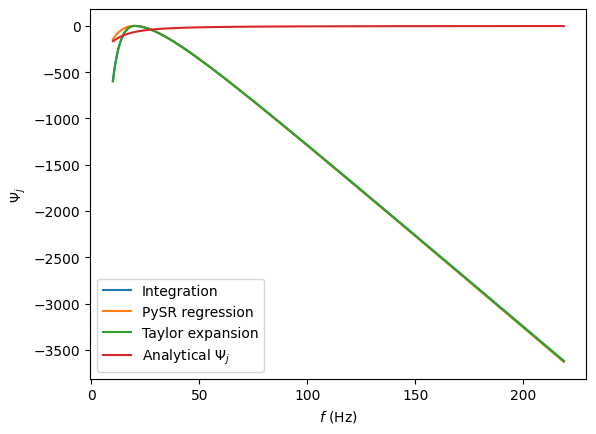

In [19]:
G = 6.67e-11
m = 20 * 2e30
eta = (0.5*m * 0.5*m)/(m**2)
c = 299792458

ISCO = c**3 / (6 ** (3 / 2) * np.pi * G * m)

fs = np.linspace(10, ISCO, 1000)
psiregl, psiintl, psitayl = [], [], []
for f in fs:
    psiregl.append(psireg(f, 0.4))
    psiintl.append(psiint(f, 0.4))
    psitayl.append(psitay(f, 0.4))

plt.plot(fs, psiintl, label="Integration")
plt.plot(fs, psiregl, label="PySR regression")
plt.plot(fs, psitayl, label="Taylor expansion")
plt.plot(fs, psij(fs, 0.4), label=r"Analytical $\Psi_j$")
plt.ylabel(r"$\Psi_j$")
plt.xlabel(r"$f$ (Hz)")
plt.legend()
plt.show()

In [13]:
import numpy as np
import scipy.integrate as integrate
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

# Constants
G = 6.67430e-11  # gravitational constant
M_sun = 1.989e30  # mass of the Sun
c = 3e8  # speed of light
eta = 1.0  # symmetric mass ratio, for simplicity let's use eta = 1

# Mass of the central object
M = 10 * M_sun  # for example, 10 times the mass of the Sun

# Define the ISCO frequency
F_ISCO = 1 / (6**(3/2) * np.pi) * np.sqrt(G * M / c**3)

# Differential equation for eccentricity evolution
def dedomega(F, e):
    return -(e * (1 - e**2) * (304 + 121 * e**2)) / (3 * F * (96 + 292 * e**2 + 37 * e**4))

# PySR symbolic regression
def regressionhigh(F, e0):
    return 0.9790411256863631 * (
        1
        / (
            F / (10 * e0)
            - (F / 10) ** 1.012737893610754
            + 1.4302123798377845
            * (1 / ((F / 10) / (e0 - 0.22142359302825657) + (0.60174062522152904 * (F / 10) ** (-F / 10) * e0) ** (F / 10) + 0.860130507088693)) ** 0.35782295061328334
        )
    ) ** 1.118891179324739

# IVP solver for eccentricity evolution
def integrate_e(F, e0):
    if F > F_ISCO or F < 10:
        return 0
    sol = solve_ivp(dedomega, [10, F_ISCO], [e0], t_eval=[F])
    return sol.y[0][0]

# Leading order Taylor expansion
def expansion(F, e0):
    if F > F_ISCO or F < 10:
        return 0
    chi = F / 10
    return (
        e0 * chi ** (-19 / 18)
        + 3323 / 1824 * e0 ** 3 * (chi ** (-19 / 18) - chi ** (-19 / 6))
        + e0 ** 5
        * (
            15994231 / 6653952 * chi ** (-19 / 18)
            - 11042329 / 1108992 * chi ** (-19 / 6)
            + 50259743 / 6653952 * chi ** (-95 / 18)
        )
    )

# Function to compute dF/dt
def dF_dt(F, e_function, e0):
    omega = 2 * np.pi * F
    e_t = e_function(F, e0)
    factor = (G * M * omega) ** (5 / 3) * omega ** 2 * eta / (5 * c ** 5 * (1 - e_t ** 2) ** (7 / 2))
    term = 96 + 292 * e_t ** 2 + 37 * e_t ** 4
    return factor * term

# Function to compute Psi_j[F(t_0)]
def Psi_j(F_0, F_ISCO, e_function, j, f, e0):
    def integrand(F):
        dFdt = dF_dt(F, e_function, e0)
        tau = F / dFdt
        return tau * (j - f / F)
    
    integral_value, _ = integrate.quad(integrand, F_0, F_ISCO)
    return 2 * np.pi * integral_value

# Parameters for Psi_j
j = 1.0  # example value

# Compute Psi_j for different e(F) functions
F_0 = 10.0  # initial frequency
f = F_0 * j  # corresponding f value from F_0 and j
e0 = 0.1  # initial eccentricity

e_functions = [integrate_e, regressionhigh, expansion]
e_labels = ['IVP Solution', 'Regression', 'Taylor Expansion']

psi_values = []

for e_function, label in zip(e_functions, e_labels):
    psi = Psi_j(F_0, F_ISCO, e_function, j, f, e0)
    psi_values.append((label, psi))
    print(f"Psi_j for e(F) = {label}: {psi}")

# Plot dF/dt for different e(F) functions from F_0 to F_ISCO
F_values = np.linspace(F_0, F_ISCO, 1000)

plt.figure(figsize=(10, 6))

for e_function, label in zip(e_functions, e_labels):
    dF_dt_values = [dF_dt(F, e_function, e0) for F in F_values]
    plt.plot(F_values, dF_dt_values, label=label)

plt.xlabel('F (Hz)')
plt.ylabel('dF/dt')
plt.title('dF/dt for different functions of e(F)')
plt.axvline(x=F_0, color='grey', linestyle='--', label='F_0')
plt.axvline(x=F_ISCO, color='red', linestyle='--', label='F_ISCO')
plt.legend()
plt.grid(True)
plt.show()


Psi_j for e(F) = IVP Solution: 335388065620829.06


TypeError: must be real number, not complex

In [20]:
# Calculating the strain for the regression, integration and Taylor expansion respectively.
def strainreg(f, e0):
    e = regressionhigh(f, e0)
    h = (G*m*np.pi*f/c**3)*((1-e**2)**(7/4)/(1+73/24*e**2 + 37/96*e**4)**(1/2))*np.exp(-1j*(np.pi/4 + psireg(f, e0)))
    return h

def strainint(f, e0):
    e = integrate(f, e0)
    h = (G*m*np.pi*f/c**3)*((1-e**2)**(7/4)/(1+73/24*e**2 + 37/96*e**4)**(1/2))*np.exp(-1j*(np.pi/4 + psiint(f, e0)))
    return h

def straintay(f, e0):
    e = expansion(f, e0)
    h = (G*m*np.pi*f/c**3)*((1-e**2)**(7/4)/(1+73/24*e**2 + 37/96*e**4)**(1/2))*np.exp(-1j*(np.pi/4 + psitay(f, e0)))
    return h

In [21]:
integration = {}
taylor = {}
regression = {}
for e0 in [0.3, 0.4, 0.5, 0.6, 0.7]:
    regression[e0], integration[e0], taylor[e0] = [], [], []
    for f in fs:
        regression[e0].append(strainreg(f, e0))
        integration[e0].append(strainint(f, e0))
        taylor[e0].append(straintay(f, e0))

In [22]:
import pycbc
from pycbc.filter import match
from pycbc.psd import aLIGOZeroDetHighPower

df = (ISCO - 10) / 1000

intseries = {}
tayseries = {}
regseries = {}
for e0 in [0.3, 0.4, 0.5, 0.6, 0.7]:
    intseries[e0] = pycbc.types.frequencyseries.FrequencySeries(integration[e0], delta_f = df)
    tayseries[e0] = pycbc.types.frequencyseries.FrequencySeries(taylor[e0], delta_f = df)
    regseries[e0] = pycbc.types.frequencyseries.FrequencySeries(regression[e0], delta_f = df)

/home/aminrs/.local/lib/python3.10/site-packages/pycbc/types/array.py:36: UserWarning: Wswiglal-redir-stdio:

SWIGLAL standard output/error redirection is enabled in IPython.
This may lead to performance penalties. To disable locally, use:

with lal.no_swig_redirect_standard_output_error():
    ...

To disable globally, use:

lal.swig_redirect_standard_output_error(True)

Note however that this will likely lead to error messages from
LAL functions being either misdirected or lost when called from
Jupyter notebooks.

To suppress this warning, use:

import warnings
warnings.filterwarnings("ignore", "Wswiglal-redir-stdio")
import lal

  import lal as _lal
PyCBC.libutils: pkg-config call failed, setting NO_PKGCONFIG=1


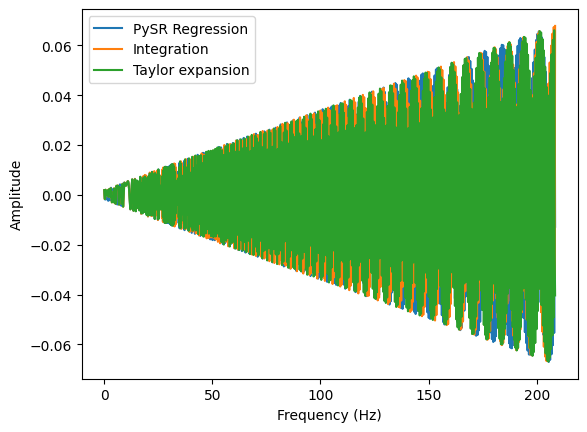

In [27]:
# Create the frequency axis
frequencies = np.arange(len(intseries[0.3])) * df

# Plot the amplitude spectrum
plt.plot(frequencies, regseries[0.4], label='PySR Regression')
plt.plot(frequencies, intseries[0.4], label="Integration")
plt.plot(frequencies, tayseries[0.4], label='Taylor expansion')
# plt.plot(frequencies, psd)
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.legend()
plt.show()

In [24]:
# Generate the aLIGO ZDHP PSD
flen = len(intseries[0.3])

f_low = 10
psd = aLIGOZeroDetHighPower(flen, df, f_low)

tay = []
new = []
for e0 in [0.3, 0.4, 0.5, 0.6, 0.7]:
    m1, i = match(intseries[e0], tayseries[e0], psd=psd, low_frequency_cutoff=f_low)
    m2, i = match(intseries[e0], regseries[e0], psd=psd, low_frequency_cutoff=f_low)
    tay.append(m1)
    new.append(m2)

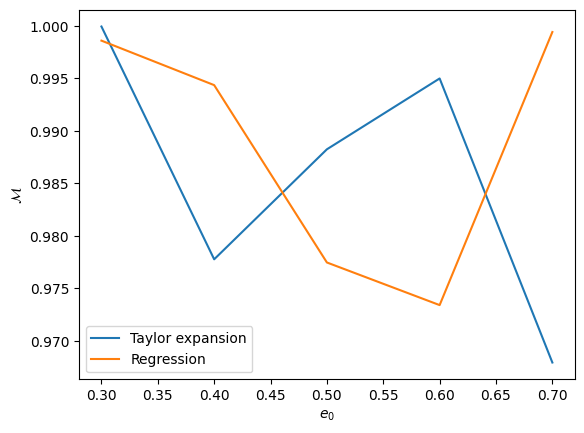

In [25]:
e0s = [0.3, 0.4, 0.5, 0.6, 0.7]
plt.plot(e0s, tay, label="Taylor expansion")
plt.plot(e0s, new, label="Regression")
plt.legend()
plt.ylabel(r"$\mathcal{M}$")
plt.xlabel(r"$e_0$")
plt.show()

In [138]:
G = 6.67e-11
m1, m2 = 10*2e30, 10*2e30
m = m1+m2
eta = (m1  *m2)/(m**2)
c = 299792458
ISCO = c**3 / (6 ** (3 / 2) * 2 * np.pi * G * m)

# Function for the differential equation
def dedx(x: list[float], e: list[float]) -> list[float]:
    x1PN = (-11888 - 14784*eta + e**2 * (87720 - 159600*eta) + e**4 * (171038 - 141708*eta) + e**6 * (11717 - 8288*eta))/(420*(1-e**2)**(9/2))
    e1PN = -(67608 + 228704 * eta + e**2 * (-718008 + 651252*eta) + e**4 * (-125361 + 93184 * eta))/(2520*(1-e**2)**(7/2))
    phi = (1 + 7.260831042*e**2 + 5.844370473*e**4 + 0.8452020270*e**6 + 0.07580633432*e**8 + 0.002034045037*e**10) / (1 - 4.900627291*e**2 + 9.512155497*e**4 - 9.051368575*e**6 + 4.096465525*e**8 - 0.5933309609*e**10 - 0.05427399445*e**12 - 0.009020225634*e**14)
    phi_tilde = (1 + 1.893242666*e**2 - 2.708117333*e**4 + 0.6192474531*e**6 + 0.05008474620*e**8 - 0.01059040781*e**10) / (1 - 4.638007334*e**2 + 8.716680569*e**4 - 8.451197591*e**6 + 4.435922348*e**8 - 1.199023304*e**10 + 0.1398678608*e**12 - 0.004254544193*e**14)
    x1_5PN = 64/5*4*np.pi*phi
    e1_5PN = 32/5*985/48*np.pi*(192/985*np.sqrt(1-e**2)/e**2 * (np.sqrt(1-e**2)*phi - phi_tilde))
    x2PN = 1/(45360 * (1-e**2)**(11/2)) * (-360224 + 4514976*eta + 1903104*eta**2 + e**2*(-92846560 + 15464736*eta + 61282032*eta**2) + e**4*(783768 - 207204264*eta + 166506060*eta**2) + e**6*(83424402 - 123108426*eta + 64828848*eta**2) + e**8*(3523113 - 3259980*eta + 1964256*eta**2) - 3024*(96 + 4268*e**2 + 4386*e**4 + 175*e**6)*(-5 + 2*eta)*np.sqrt(1-e**2))
    e2PN = 1/(30240*(1-e**2)**(9/2)) * (-15198032 + 13509360*eta + 4548096*eta**2 + e**2*(-36993396 - 35583228*eta + 48711348*eta**2) + e**4*(46579718 - 78112266*eta + 42810096*eta**2) + e**6*(3786543 - 4344852*eta + 2758560*eta**2) - 1008*(2672 + 6963*e**2+565*e**4)*(-5+2*eta)*np.sqrt(1-e**2))
    return -e/x * ((304 + 121*e**2)/(15*(1-e**2)**(5/2)) + e1PN * x + e1_5PN*x**(3/2) + e2PN * x**2) / ((192 + 584 * e**2 + 74 * e**4)/(15*(1-e**2)**(7/2)) + x1PN * x + x1_5PN * x**(3/2) + x2PN * x**2)

def omegadot(x, e):
    eta=0.25
    x1PN = (-11888 - 14784*eta + e**2 * (87720 - 159600*eta) + e**4 * (171038 - 141708*eta) + e**6 * (11717 - 8288*eta))/(420*(1-e**2)**(9/2))
    phi = (1 + 7.260831042*e**2 + 5.844370473*e**4 + 0.8452020270*e**6 + 0.07580633432*e**8 + 0.002034045037*e**10) / (1 - 4.900627291*e**2 + 9.512155497*e**4 - 9.051368575*e**6 + 4.096465525*e**8 - 0.5933309609*e**10 - 0.05427399445*e**12 - 0.009020225634*e**14)
    x1_5PN = 64/5*4*np.pi*phi
    x2PN = 1/(45360 * (1-e**2)**(11/2)) * (-360224 + 4514976*eta + 1903104*eta**2 + e**2*(-92846560 + 15464736*eta + 61282032*eta**2) + e**4*(783768 - 207204264*eta + 166506060*eta**2) + e**6*(83424402 - 123108426*eta + 64828848*eta**2) + e**8*(3523113 - 3259980*eta + 1964256*eta**2) - 3024*(96 + 4268*e**2 + 4386*e**4 + 175*e**6)*(-5 + 2*eta)*np.sqrt(1-e**2))
    return eta*c**3*x**5/(G*m)*((192+584*e**2+74*e**4)/(15*(1-e**2)**(7/2)) + x1PN*x + x1_5PN*x**(3/2) + x2PN*x**2)

def integrate(x, e0):
    sol = solve_ivp(
        dedx,
        [(G*m*np.pi*10/ c**3)**(2/3), 1/6],
        [e0],
        t_eval=[x],
    )
    return sol.y[0][0]

def integrand(omega, e0):
    x = (G*m*omega/c**3)**(2/3)
    e = integrate(x, e0)
    odot = c**3/(G*m) * omegadot(x, e)**(3/2)
    return omega/odot

print(quad(integrand, 2*np.pi*10, 2*np.pi*ISCO, args=(0.001))[0]/np.pi)
print(quad(integrand, 2*np.pi*10, 2*np.pi*ISCO, args=(0.01))[0]/np.pi)
print(quad(integrand, 2*np.pi*10, 2*np.pi*ISCO, args=(0.1))[0]/np.pi)
print(quad(integrand, 2*np.pi*10, 2*np.pi*ISCO, args=(0.2))[0]/np.pi)
print(quad(integrand, 2*np.pi*10, 2*np.pi*ISCO, args=(0.3))[0]/np.pi)

768.1409892461544
768.0329950037343
757.0032494290406
720.7043897272086
650.5176432651765


In [140]:
def pysrfit(e0, x):
    e = 0.7437754023095167*e0*(e0**2 + np.exp(e0)**1.311931736620892 - 0.30632593628732413 + 0.06091994064988366/x)/(e0 + x*(1.0833788704690209 - x) + x + (1.2002319584105975*(x**(-12.478775250960325))**1.005249024454688 + 6002214534.5191668)**x) + 0.000343124952877091 # e_0 0-0.3
    return e
    
def expansion(e0, x, m, eta):
    chi = (x)**(3/2)*c**3/(10*G*m*np.pi)
    D0 = e0*chi**(-19/18) + 3323/1824 * e0**3*(chi**(-19/18) - chi**(-19/6)) + e0**5 * (15994231/6653952*chi**(-19/18) - 11042329/1108992*chi**(-19/6) + 50259743/6653952*chi**(-95/18))
    D2 = ((2833/2016 - 197/72*eta)*(-chi**(-19/18) + chi**(-31/18)))*e0 + ((-9414059/3677184 + 654631/131328*eta)*chi**(-19/18) + (386822573/47803392 - 1482433/131328*eta)*chi**(-31/18) + (11412055/5311488 - 378697/43776*eta)*chi**(-19/6) + (-9414059/1225728 + 654631/43776*eta)*chi**(-23/6))*e0**3 + ((-45311656423/13414367232 + 3150863507/479084544*eta)*chi**(-19/18) + (3061519891285/174386774016 - 11147601665/479084544*eta)*chi**(-31/18) + (37922258765/3229384704 - 1258410131/26615808*eta)*chi**(-19/6) + (-699589093187/9688154112 + 3092267495/26615808*eta)*chi**(-23/6) + (-1182747028465/174386774016 + 24493152461/479084544*eta)*chi**(-95/18) + (711929259595/13414367232 - 49505846855/479084544*eta)*chi**(-107/18))*e0**5
    D3 = 377*np.pi/144*(-chi**(-19/18) + chi**(-37/18))*e0 + (-1252771*np.pi/262656*chi**(-19/18) + 1315151*np.pi/131328*chi**(-37/18) + 396797*np.pi/43776*chi**(-19/6) - 1252771*np.pi/87552*chi**(-25/6))*e0**3 + (-6029825087*np.pi/958169088*chi**(-19/18) + 607032981553*np.pi/27786903552*chi**(-37/18) + 1318556431*np.pi/26615808*chi**(-19/6) - 1422200801*np.pi/13307904*chi**(-25/6) - 1586634546601*np.pi/27786903552*chi**(-95/18) + 94739615555*np.pi/958169088*chi**(-113/18))*e0**5
    D4 = ((77006005/24385536 - 1143767/145152*eta + 43807/10368*eta**2)*chi**(-19/18) + (-8025889/4064256 + 558101/72576*eta - 38809/5184*eta**2)*chi**(-31/18) + (-28850671/24385536 + 27565/145152*eta + 33811/10368*eta**2)*chi**(-43/18))*e0 + ((255890954615/44479217664 - 3800737741/264757248*eta + 145570661/18911232*eta**2)*chi**(-19/18) + (-1095868349309/96371638272 + 65400285919/1720922112*eta - 292039301/9455616*eta**2)*chi**(-31/18) + (-20952382669619/4047608807424 - 385200824731/24092909568*eta + 4301644427/132378624*eta**2)*chi**(-43/18) + (8180980796033/1349202935808 + 14604819923/2676989952*eta - 317361763/14708736*eta**2)*chi**(-19/6) + (32330351815/3569319936 - 10345778159/191213568*eta + 74603309/1050624*eta**2)*chi**(-23/6) + (-9164199307/2118057984 + 1205846917/29417472*eta - 13714021/233472*eta**2)*chi**(-9/2))*e0**3 + ((1231651832357155/162260186038272 - 18293673608177/965834440704*eta + 700659277417/68988174336*eta**2)*chi**(-19/18) + (-8673285852010405/351563736416256 + 506837220151715/6277923864576*eta - 2196077528005/34494087168*eta**2)*chi**(-31/18) + (-4719697288288984795/191953800083275776 - 4676818769915975/87890934104064*eta + 669607180808035/6277923864576*eta**2)*chi**(-43/18) + (27185399185217659/820315384971264 + 48531816604129/1627609890816*eta - 1054593138449/8942911488*eta**2)*chi**(-19/6) + (2402572738143295/28211904774144 - 55792908667709/116257849344*eta + 352402173805/638779392*eta**2)*chi**(-23/6) + (-25186092424407371/273438461657088 + 936816311138573/1627609890816*eta - 1951606822255/2980970496*eta**2)*chi**(-9/2) + (-7937050519029473999/19153800083275776 - 1089957759112387/87890934104064*eta + 1121044759543031/6277923864576*eta**2)*chi**(-95/18) + (-16753611658206725/351563736416256 + 2837648691484435/6277923864576*eta - 24125755174085/34494087168*eta**2)*chi**(-107/18) + (16633441088056655/162260186038272 - 79153315354555/137976348672*eta + 47507268174605/68988174336*eta**2)*chi**(-119/18))*e0**5

    e = D0 + D2 * x + D3 * x**(3/2) + D4 * x**2
    e = np.nan_to_num(e, nan=0.0, posinf=1e10, neginf=-1e10)
    
    return e

def integrandexp(omega, e0):
    x = (G*m*omega/c**3)**(2/3)
    e = expansion(e0, x, m, eta)
    odot = c**3/(G*m) * omegadot(x, e)**(3/2)
    return omega/odot

print(quad(integrandexp, 2*np.pi*10, 2*np.pi*ISCO, args=(0.001))[0]/np.pi)
print(quad(integrandexp, 2*np.pi*10, 2*np.pi*ISCO, args=(0.01))[0]/np.pi)
print(quad(integrandexp, 2*np.pi*10, 2*np.pi*ISCO, args=(0.1))[0]/np.pi)
print(quad(integrandexp, 2*np.pi*10, 2*np.pi*ISCO, args=(0.2))[0]/np.pi)
print(quad(integrandexp, 2*np.pi*10, 2*np.pi*ISCO, args=(0.3))[0]/np.pi)

def integrandpysr(omega, e0):
    x = (G*m*omega/c**3)**(2/3)
    e = pysrfit(e0, x)
    odot = c**3/(G*m) * omegadot(x, e)**(3/2)
    return omega/odot

print(quad(integrandpysr, 2*np.pi*10, 2*np.pi*ISCO, args=(0.001))[0]/np.pi)
print(quad(integrandpysr, 2*np.pi*10, 2*np.pi*ISCO, args=(0.01))[0]/np.pi)
print(quad(integrandpysr, 2*np.pi*10, 2*np.pi*ISCO, args=(0.1))[0]/np.pi)
print(quad(integrandpysr, 2*np.pi*10, 2*np.pi*ISCO, args=(0.2))[0]/np.pi)
print(quad(integrandpysr, 2*np.pi*10, 2*np.pi*ISCO, args=(0.3))[0]/np.pi)

768.1409929933417
768.033379568978
757.0179158142755
720.5990656937238
650.3159966033024
768.138242246844
768.0299320919744
758.0381194035473
724.7160639644244
663.1222734379854
